# Source

[Inferencial Statistical Analysis](https://www.coursera.org/learn/inferential-statistical-analysis-python)

[Statistics for Data Scientists](https://github.com/andrewgbruce/statistics-for-data-scientists)

[Statistics 101 : Brandon Foltz](https://www.youtube.com/channel/UCFrjdcImgcQVyFbK04MBEhA)

# Statistical Inference with Confidence Intervals

Equation for calculating confidence intervals is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** and the *Margin of Error* is the **t-multiplier**.

The t-multiplier is calculated based on the degrees of freedom and desired confidence level.  For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

Lastly, the Standard Error is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import numpy as np
from scipy import stats
from scipy.stats.contingency import expected_freq

import pandas as pd
import scipy.stats.distributions as dist

from seaborn.algorithms import bootstrap
from seaborn import utils
import seaborn as sns

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [10]:
# Percent point function (inverse of cdf — percentiles).
stats.norm.ppf(0.975)

1.959963984540054

In [11]:
# n - sample size
# p - population proportion
n = 659
p = 0.85
tstar = 1.96

se = np.sqrt((p * (1 - p)) / n)
lcb = p - tstar * se
ucb = p + tstar * se
(lcb, ucb)

(0.8227373256215749, 0.8772626743784251)

In [12]:
sm.stats.proportion_confint(n * p, n)

(0.8227378265796143, 0.8772621734203857)

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/tamalmuk21/Stat_with_python/master/stat/Cartwheeldata.csv")

In [16]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [17]:
mean = df['CWDistance'].mean()
std = df['CWDistance'].std()
n = df.shape[0]

In [34]:
stats.norm.ppf(0.95 + 0.05/2)

1.959963984540054

In [35]:
tstar = 1.96
se = std / np.sqrt(n)
lcb = mean - tstar * se
ucb = mean + tstar * se
(lcb, ucb)

(76.57704746419218, 88.38295253580783)

In [36]:
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean(alpha=0.05)

(76.57715593233026, 88.38284406766975)

## Investigating and Cleaning Data

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/joanby/estadistica-inferencial/master/datasets/nhanes_2015_2016.csv")

In [39]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [41]:
# Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
df["SMQ020x"] = df.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
df["SMQ020x"]

0       Yes
1       Yes
2       Yes
3        No
4        No
       ... 
5730    Yes
5731     No
5732    Yes
5733    Yes
5734     No
Name: SMQ020x, Length: 5735, dtype: object

In [42]:
# Recode RIAGENDR from 1/2 to Male/Female into new variable RIAGENDRx
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})
df["RIAGENDRx"]

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: RIAGENDRx, Length: 5735, dtype: object

In [43]:
dx = df[["SMQ020x", "RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [44]:
# Recode SMQ020x from Yes/No to 1/0 into existing variable SMQ020x
dx["SMQ020x"] = dx.SMQ020x.replace({"Yes": 1, "No": 0})

In [51]:
dz = dx.groupby("RIAGENDRx").agg({"SMQ020x": [np.sum, np.size]})
dz.columns = ["Proportion", "Total n"]
dz

,Proportion,Total n
RIAGENDRx,,
Female,906,2972
Male,1413,2753


## Difference of Two Population Proportions

the standard error for difference of population proportions and means is:

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{(SE_{\ 1})^2 + (SE_{\ 2})^2}$$

In [46]:
p = .304845
n = 2972
se_female = np.sqrt(p * (1 - p)/n)
se_female

0.00844415041930423

In [47]:
p = .513258
n = 2753
se_male = np.sqrt(p * (1 - p)/ n)
se_male

0.009526078787008965

In [48]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729880335656654

In [49]:
d = .304845 - .513258
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(-0.23336356545788706, -0.18346243454211297)

## Difference of Two Population Means

In [56]:
df.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [57]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [58]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18538993598139303

In [59]:
d = 29.939946 - 28.778072

In [60]:
lcb = d - 1.96 * sem_diff
ucb = d + 1.96 * sem_diff
(lcb, ucb)

(0.798509725476467, 1.5252382745235278)

# Hypothesis Testing

**Null Hypothesis: $H_0$**

**Alternative Hypothesis: $H_a$**

* One Population Proportion
* Difference in Population Proportions
* One Population Mean
* Difference in Population Means

## One Population Proportion

In previous years 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media? 

**Population**: Parents with a teenager (age 13-18)  
**Parameter of Interest**: p  
**Null Hypothesis:** p = 0.52  
**Alternative Hypthosis:** p > 0.52 (note that this is a one-sided test)

1018 Parents

56% believe that their teenager’s lack of sleep is caused due to electronics and social media.

In [7]:
n = 1018
pnull = .52
phat = .56
sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger', prop_var=0.52)

(2.5545334262132955, 0.005316510991822442)

## Difference in Population Proportions

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

**Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
**Parameter of Interest**: p1 - p2, where p1 = black and p2 = hispanic  
**Null Hypothesis:** p1 - p2 = 0  
**Alternative Hypthosis:** p1 - p2 $\neq$ = 0  


91 out of 247 (36.8%) sampled parents of black children report that their child has had some swimming lessons.

120 out of 308 (38.9%) sampled parents of Hispanic children report that their child has had some swimming lessons.

In [8]:
# Sample sizes
n1 = 247
n2 = 308

# Number of parents reporting that their child had some swimming lessons
y1 = 91
y2 = 120

# Estimates of the population proportions
p1 = round(y1 / n1, 2)
p2 = round(y2 / n2, 2)

# Estimate of the combined population proportion
phat = (y1 + y2) / (n1 + n2)

# Estimate of the variance of the combined population proportion
va = phat * (1 - phat)

# Estimate of the standard error of the combined population proportion
se = np.sqrt(va * (1 / n1 + 1 / n2))

# Test statistic and its p-value
test_stat = (p1 - p2) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

# Print the test statistic its p-value
print("Test Statistic")
print(round(test_stat, 2))

print("\nP-Value")
print(round(pvalue, 2))

Test Statistic
-0.48

P-Value
0.63


## One Population Mean

Is the average cartwheel distance (in inches) for adults 
more than 80 inches?

**Population**: All adults  
**Parameter of Interest**: $\mu$, population mean cartwheel distance.
**Null Hypothesis:** $\mu$ = 80
**Alternative Hypthosis:** $\mu$ > 80

25 Adults

$\mu = 82.46$

$\sigma = 15.06$

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/tamalmuk21/Stat_with_python/master/stat/Cartwheeldata.csv")

In [11]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [15]:
mean = df['CWDistance'].mean()
sd = df['CWDistance'].std()
n = df.shape[0]
(n, sd, mean)

(25, 15.058552387264855, 82.48)

In [16]:
tsm.stats.ztest(df['CWDistance'], value=80, alternative='larger')

(0.8234523266982029, 0.20512540845395266)

## Difference in Population Means

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/joanby/estadistica-inferencial/master/datasets/nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [19]:
females = df[df["RIAGENDR"] == 2]
male = df[df["RIAGENDR"] == 1]

In [20]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [21]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [24]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())

(6.1755933531383205, 6.591544431126401e-10)

z-statistics is very large and pvalue is very small --> we can reject the null hypothesis and validate the alternative $H_a$ where the two populations are significantly different 

## Hypothesis Tests for One Proportion

The most basic hypothesis test may be the one-sample test for a proportion.  This test is used if we have specified a particular value as the null value for the proportion, and we wish to assess if the data are compatible with the true parameter value being equal to this specified value.  One-sample tests are not used very often in practice, because it is not very common that we have a specific fixed value to use for comparison. For illustration, imagine that the rate of lifetime smoking in another country was known to be 40%, and we wished to assess whether the rate of lifetime smoking in the US were different from 40%.  In the following notebook cell, we carry out the (two-sided) one-sample test that the population proportion of smokers is 0.4, and obtain a p-value of 0.43.  This indicates that the NHANES data are compatible with the proportion of (ever) smokers in the US being 40%. 

In [25]:
df["SMQ020x"] = df.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

In [28]:
x = (df.SMQ020x.dropna() == "Yes")
p = x.mean()
se = np.sqrt(.4 * (1 - .4) / len(x))
test_stat = (p - 0.4) / se
test_stat

0.7823563854332805

In [29]:
pvalue = 2 * dist.norm.cdf(-np.abs(test_stat))
print(test_stat, pvalue)

0.7823563854332805 0.4340051581348052


In [30]:
sm.stats.proportions_ztest(x.sum(), len(x), 0.4)

(0.7807518954896244, 0.43494843171868214)

In [31]:
sm.stats.binom_test(x.sum(), len(x), 0.4)

0.4340360854459431

## Hypothesis Tests for Two Proportions

Comparative tests tend to be used much more frequently than tests comparing one population to a fixed value.  A two-sample test of proportions is used to assess whether the proportion of individuals with some trait differs between two sub-populations.  For example, we can compare the smoking rates between females and males. Since smoking rates vary strongly with age, we do this in the subpopulation of people between 20 and 25 years of age.  In the cell below, we carry out this test without using any libraries, implementing all the test procedures covered elsewhere in the course using Python code.  We find that the smoking rate for men is around 10 percentage points greater than the smoking rate for females, and this difference is statistically significant (the p-value is around 0.01).

In [32]:
dx = df[["SMQ020x", "RIDAGEYR", "RIAGENDRx"]].dropna()

dx.head()

,SMQ020x,RIDAGEYR,RIAGENDRx
0,Yes,62,Male
1,Yes,53,Male
2,Yes,78,Male
3,No,56,Female
4,No,42,Female


In [33]:
p = dx.groupby("RIAGENDRx")["SMQ020x"].agg([lambda z: np.mean(z == "Yes"), "size"])
p.columns = ["Smoke", "N"]
print(p)

              Smoke     N
RIAGENDRx                
Female     0.304845  2972
Male       0.513258  2753


In [34]:
p_comb = (dx.SMQ020x == "Yes").mean()
va = p_comb * (1 - p_comb)

se = np.sqrt(va * (1 / p.N.Female + 1 / p.N.Male))
(p_comb, va, se)

(0.4050655021834061, 0.2409874411243111, 0.01298546309757376)

In [35]:
test_stat = (p.Smoke.Female - p.Smoke.Male) / se
p_value = 2 * dist.norm.cdf(-np.abs(test_stat))
(test_stat, p_value)

(-16.049719603652488, 5.742288777302776e-58)

In [36]:
dx_females = dx.loc[dx.RIAGENDRx == "Female", "SMQ020x"].replace({"Yes": 1, "No": 0})
dx_females

3       0
4       0
5       0
7       0
12      1
       ..
5724    0
5727    0
5730    1
5732    1
5734    0
Name: SMQ020x, Length: 2972, dtype: int64

In [37]:
dx_males = dx.loc[dx.RIAGENDRx == "Male", "SMQ020x"].replace({"Yes": 1, "No": 0})

In [38]:
sm.stats.ttest_ind(dx_females, dx_males)

(-16.420585558984445, 3.0320887866906843e-59, 5723.0)

## Hypothesis Tests Comparing Means

Tests of means are similar in many ways to tests of proportions.  Just as with proportions, for comparing means there are one and two-sample tests, z-tests and t-tests, and one-sided and two-sided tests.  As with tests of proportions, one-sample tests of means are not very common, but we illustrate a one sample test in the cell below.  We compare systolic blood pressure to the fixed value 120 (which is the lower threshold for "pre-hypertension"), and find that the mean is significantly different from 120 (the point estimate of the mean is 126).

In [39]:
dx = df[["BPXSY1", "RIDAGEYR", "RIAGENDRx"]].dropna()
dx = dx.loc[(dx.RIDAGEYR >= 40) & (dx.RIDAGEYR <= 50) & (dx.RIAGENDRx == "Male"), :]

In [40]:
print(dx.BPXSY1.mean())

125.86698337292161


In [41]:
sm.stats.ztest(dx.BPXSY1, value=120)

(7.469764137102597, 8.033869113167905e-14)

In the cell below, we carry out a formal test of the null hypothesis that the mean blood pressure for women between the ages of 50 and 60 is equal to the mean blood pressure of men between the ages of 50 and 60.  The results indicate that while the mean systolic blood pressure for men is slightly greater than that for women (129 mm/Hg versus 128 mm/Hg), this difference is not statistically significant. 

There are a number of different variants on the two-sample t-test. Two often-encountered variants are the t-test carried out using the t-distribution, and the t-test carried out using the normal approximation to the reference distribution of the test statistic, often called a z-test.  Below we display results from both these testing approaches.  When the sample size is large, the difference between the t-test and z-test is very small.  

In [42]:
dx = df[["BPXSY1", "RIDAGEYR", "RIAGENDRx"]].dropna()
dx = dx.loc[(dx.RIDAGEYR >= 50) & (dx.RIDAGEYR <= 60), :]
dx.head()

,BPXSY1,RIDAGEYR,RIAGENDRx
1,146.0,53,Male
3,132.0,56,Female
9,178.0,56,Male
15,134.0,57,Female
19,136.0,54,Female


In [43]:
bpx_female = dx.loc[dx.RIAGENDRx=="Female", "BPXSY1"]
bpx_male = dx.loc[dx.RIAGENDRx=="Male", "BPXSY1"]
print(bpx_female.mean(), bpx_male.mean())

127.92561983471074 129.23829787234044


In [44]:
print(sm.stats.ztest(bpx_female, bpx_male))

(-1.105435895556249, 0.2689707570859362)


Another important aspect of two-sample mean testing is "heteroscedasticity", meaning that the variances within the two groups being compared may be different. While the goal of the test is to compare the means, the variances play an important role in calibrating the statistics (deciding how big the mean difference needs to be to be declared statisitically significant). In the NHANES data, we see that there are moderate differences between the amount of variation in BMI for females and for males, looking within 10-year age bands. In every age band, females having greater variation than males. 

In [45]:
dx = df[["BMXBMI", "RIDAGEYR", "RIAGENDRx"]].dropna()
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
df.groupby(["agegrp", "RIAGENDRx"])["BMXBMI"].agg(np.std).unstack()

RIAGENDRx,Female,Male
agegrp,,
"(18, 30]",7.745893,6.649440
"(30, 40]",8.315608,6.622412
"(40, 50]",8.076195,6.407076
"(50, 60]",7.575848,5.914373
"(60, 70]",7.604514,5.933307
"(70, 80]",6.284968,4.974855


The standard error of the mean difference (e.g. mean female blood pressure minus mean mal blood pressure) can be estimated in at least two different ways. In the statsmodels library, these approaches are referred to as the "pooled" and the "unequal" approach to estimating the variance. If the variances are equal (i.e. there is no heteroscedasticity), then there should be little difference between the two approaches. Even in the presence of moderate heteroscedasticity, as we have here, we can see that the results for the two differences are quite similar. Below we have a loop that considers each 10-year age band and assesses the evidence for a difference in mean BMI for women and for men. The results printed in each row of output are the test-statistic and p-value. 

In [46]:
for k, v in df.groupby("agegrp"):
    bmi_female = v.loc[v.RIAGENDRx=="Female", "BMXBMI"].dropna()
    bmi_female = sm.stats.DescrStatsW(bmi_female)
    bmi_male = v.loc[v.RIAGENDRx=="Male", "BMXBMI"].dropna()
    bmi_male = sm.stats.DescrStatsW(bmi_male)
    print(k)
    print("pooled: ", sm.stats.CompareMeans(bmi_female, bmi_male).ztest_ind(usevar='pooled'))
    print("unequal: ", sm.stats.CompareMeans(bmi_female, bmi_male).ztest_ind(usevar='unequal'))
    print()

(18, 30]
pooled:  (1.7026932933643306, 0.08862548061449803)
unequal:  (1.7174610823927183, 0.08589495934713169)

(30, 40]
pooled:  (1.4378280405644919, 0.15048285114648174)
unequal:  (1.4437869620833497, 0.1487989105789246)

(40, 50]
pooled:  (2.8933761158070186, 0.003811246059501354)
unequal:  (2.9678691663536725, 0.0029987194174035366)

(50, 60]
pooled:  (3.362108779981383, 0.0007734964571391287)
unequal:  (3.3754943901739387, 0.0007368319423226156)

(60, 70]
pooled:  (3.617240144243268, 0.00029776102103194453)
unequal:  (3.628483094544553, 0.00028509141471492935)

(70, 80]
pooled:  (2.926729252512241, 0.003425469414486057)
unequal:  (2.9377798867692064, 0.0033057163315194853)



In [47]:
bmi_female

# BootStrap

Ref.[Wikepedia](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

**Advantages**

A great advantage of bootstrap is its simplicity. It is a straightforward way to derive estimates of standard errors and confidence intervals for complex estimators of complex parameters of the distribution, such as percentile points, proportions, odds ratio, and correlation coefficients. Bootstrap is also an appropriate way to control and check the stability of the results. Although for most problems it is impossible to know the true confidence interval, bootstrap is asymptotically more accurate than the standard intervals obtained using sample variance and **assumptions of normality.**[16] The bootstrapping also is a convenient method that avoids the cost of repeating the experiment to get other groups of sample data.

**Disadvantages**

Although bootstrapping is (under some conditions) asymptotically consistent, it does not provide general finite-sample guarantees. The result may depend on the representative sample. The apparent simplicity may conceal the fact that important assumptions are being made when undertaking the bootstrap analysis (e.g. independence of samples) where these would be more formally stated in other approaches. Also, the bootstrapping can be time-consuming.

In [2]:
loan_income = pd.read_csv("data/loans_income.csv")
loan_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [6]:
loan_income.median()

x    62000.0
dtype: float64

In [11]:
bs = bootstrap(loan_income, func=np.median)

In [17]:
original = loan_income.median().item()
bias =  (bs.mean() - original).item()
sd = bs.std()
original, bias, sd

(62000.0, -70.91004999999859, 211.24608607971294)

<AxesSubplot:ylabel='Count'>

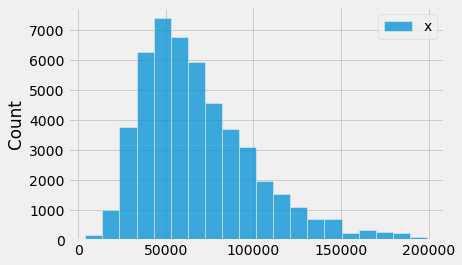

In [22]:
sns.histplot(loan_income, bins=20)

In [24]:
# Confidance interval for BootStram median
utils.ci(bs, 90)

array([61424., 62000.])

In [41]:
toy_sample = np.array([30, 37, 36, 43, 42, 43, 43, 46, 41, 42])
toy_sample.shape

(10,)

In [42]:
mean = toy_sample.mean()
mean

40.3

In [52]:
bs = bootstrap(toy_sample, n_boot=20)
bs.shape

(20,)

In [55]:
diff = bs - mean
diff = np.sort(diff)
np.percentile(diff, [10, 90])

array([-1.75,  1.12])

In [56]:
(mean -1.75, mean + 1.12)

(38.55, 41.419999999999995)

In [54]:
# CI 80%
np.percentile(bs, [10, 90])

array([38.55, 41.42])

# Normal Distribution QQ plot

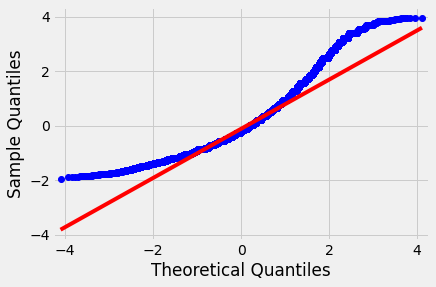

In [64]:
sm.qqplot(loan_income.x, line="q", fit=True);

In [65]:
sp500_px = pd.read_csv("data/sp500_data.csv")
sp500_px.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [70]:
nflx = sp500_px['NFLX']
nflx = nflx[nflx > 0].apply(np.log).diff().dropna()

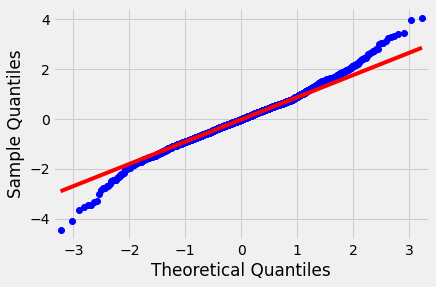

In [72]:
sm.qqplot(nflx, line="q", fit=True);

# Permutation Test

In [82]:
session_times = pd.read_csv("data/web_page_data.csv")
session_times['Time'] = session_times['Time'] * 100 
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


<AxesSubplot:>

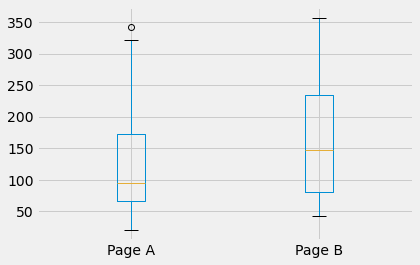

In [83]:
session_times.pivot(columns="Page", values="Time").boxplot()

In [94]:
session_times.groupby("Page").agg(["mean", "size"])

Time     
              mean size
Page                   
Page A  126.333333   21
Page B  162.000000   15

In [101]:
mean_a = session_times.query("Page == 'Page A'").Time.mean()
mean_b = session_times.query("Page == 'Page B'").Time.mean()

In [124]:
def perm_fun(x, n1, n2):
    n = np.arange(n1 + n2)
    idx_b = np.random.choice(n, n1, replace=False)
    idx_a = np.setdiff1d(n, idx_b)
    mean_diff = x[idx_b].mean() - x[idx_a].mean()
    return mean_diff

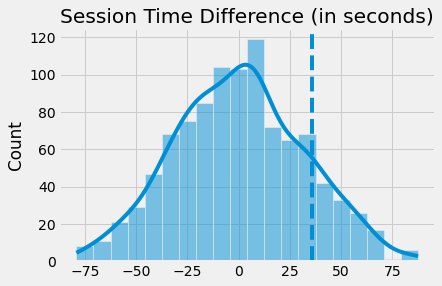

In [127]:
N = 1000
perm_diff = np.zeros(N)
x = session_times["Time"].values

for i in range(N):
    perm_diff[i] = perm_fun(x, 15, 21)

sns.histplot(perm_diff, kde=True)
plt.title("Session Time Difference (in seconds)")
plt.axvline(x=(mean_b - mean_a), ls="--")

In [141]:
# 14% of chance of having results more extreme than the observed
(perm_diff > (mean_b - mean_a)).mean()

0.142

# p-value

In [143]:
conversion = pd.DataFrame({
    'Result': ['convertion', 'no conversion'],
    'Price A': [200, 23539],
    'Price B': [182, 22406]
})

conversion

,Result,Price A,Price B
0,convertion,200,182
1,no conversion,23539,22406


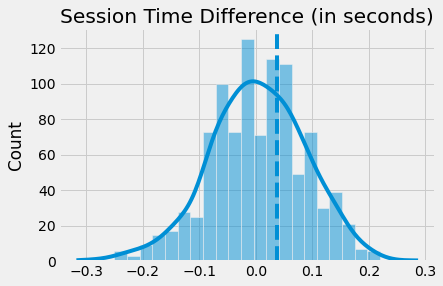

In [147]:
N = 1000
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
conversion = np.append(np.zeros(45945), np.ones(382))
perm_diff = np.zeros(N)

for i in range(N):
    perm_diff[i] = 100 * perm_fun(conversion, 23739, 22588)
    
sns.histplot(perm_diff, kde=True)
plt.title("Session Time Difference (in seconds)")
plt.axvline(x=obs_pct_diff, ls="--")

In [150]:
print('p-value:')
(perm_diff > obs_pct_diff).mean()

p-value:


0.338

In [154]:
sm.stats.proportions_ztest([200, 182], [23739, 22588], alternative="larger")

(0.437307786942451, 0.33094407441560325)

# t-Test

In [157]:
session_times.groupby("Page").mean()

,Time
Page,
Page A,126.333333
Page B,162.000000


In [158]:
pb = session_times.query("Page == 'Page B'")["Time"].values
pa = session_times.query("Page == 'Page A'")["Time"].values
sm.stats.ttest_ind(pb, pa, alternative="larger")

(1.1237042154424814, 0.1345051218196303, 34.0)

# ANOVA

Analisis of Variance

$H_0 = means belongs to the same population$

$\frac{variance between}{variance within}$

$\frac{LARGER}{small}=reject H_0$ --> At least one mean is an outlier and each distribution is narrow; distinct from each other.

**Exemple 1** 

One way ANOVA

Twenty-one students at the Autonomous University of Madrid (AUM) in Spain were selected for an informal study about student study skill; 7 first year, 7 second year, and 7 third year undergraduates were randomly selected.

The students were given a study-skills assessment having a maximum score of 100. As researches we are interested in whether or not a difference existis somewhere between the three different year levels.

In [115]:
students_scores = pd.read_csv("data/one_way_anova.csv")

In [116]:
students_scores

,Year 1 Scores,Year 2 Scores,Year 3 Scores
0,82,71,64
1,93,62,73
2,61,85,87
3,74,94,91
4,69,78,56
5,70,66,78
6,53,71,87


In [118]:
students_scores.mean()

Year 1 Scores    71.714286
Year 2 Scores    75.285714
Year 3 Scores    76.571429
dtype: float64

In [119]:
students_scores.mean().mean()

74.52380952380952

In [123]:
F, p_value = stats.f_oneway(
    students_scores["Year 1 Scores"],
    students_scores["Year 2 Scores"],
    students_scores["Year 3 Scores"],
)

In [125]:
F, p_value

(0.2837261275904103, 0.7562784116739912)

In [127]:
students_scores.size - students_scores.shape[1]

18

In [128]:
# numerator C - 1
dfn = students_scores.shape[1] - 1
# denominator N - C
dfd = students_scores.size - students_scores.shape[1]

stats.f.ppf(.95, dfn=dfn, dfd=dfd)

3.554557145661787

since the F statistics (0.28) is not greater then critical value (3.55), we fail to reject the $H_0$.

**Example 2** 
Let's assueme that Starbucks uses "secret shoppers" who appear to be customers to enter a store and document their experience in terms of customer service, cleanliness, and quality. The secret shoppers receive standardized training by Starbucks to ensure consistency and objectivity in their store reviews.

For its location in Australian cities of Sydney, Brisbane, and Melbourn, Startbucks has trained 6 secret shoppers. Each of the 6 will be assigned to visit the same store in each of the 3 cities. The visit sequence will be assigned randomly (hence randomized block design).

We would like to know if a difference in secret shopper ratings exists **among the cities**. Are they all about the same? Is one significantly higher than the other two? Are all three different from each other?

In [3]:
secret_shoppers = pd.read_csv("data/two_way_anova.csv")

In [4]:
secret_shoppers

,Shopper,Sydney,Brisbane,Melbourne
0,1,75,75,90
1,2,70,70,70
2,3,50,55,75
3,4,65,60,85
4,5,80,65,80
5,6,65,65,65


In [5]:
secret_shoppersx = pd.melt(
    secret_shoppers, 
    id_vars="Shopper", 
    value_vars=["Sydney", "Brisbane", "Melbourne"],
    var_name="city",
    value_name="score"
)
secret_shoppersx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Shopper  18 non-null     int64 
 1   city     18 non-null     object
 2   score    18 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [6]:
secret_shoppersx.columns = ["shopper", "city", "score"]

In [7]:
model = ols("score ~ C(city) + C(shopper)", data=secret_shoppersx).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(city),525.0,2.0,5.526316,0.024181
C(shopper),750.0,5.0,3.157895,0.057399
Residual,475.0,10.0,NaN,NaN


**Example 3**

In [8]:
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   water   30 non-null     object
 1   sun     30 non-null     object
 2   height  30 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [9]:
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


**Example 4**

In [193]:
four_sessions = pd.read_csv("data/four_sessions.csv")

In [195]:
four_sessionsx = four_sessions.copy()
four_sessionsx["index"] = [i for i in range(5) for _ in range(4)] 

In [196]:
four_sessionsx

,Page,Time,index
0,Page 1,164,0
1,Page 2,178,0
2,Page 3,175,0
3,Page 4,155,0
4,Page 1,172,1
5,Page 2,191,1
6,Page 3,193,1
7,Page 4,166,1
8,Page 1,177,2
9,Page 2,182,2


In [197]:
four_sessionsx = four_sessionsx.pivot(index="index", columns="Page", values="Time")

<AxesSubplot:>

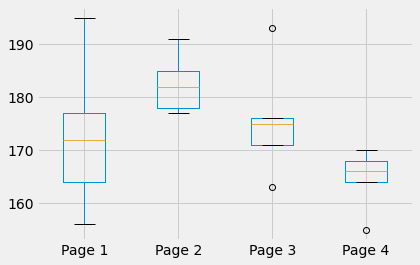

In [198]:
four_sessionsx.boxplot()

In [200]:
model = ols("Time ~ Page", data=four_sessions).fit()
table = sm.stats.anova_lm(model, typ=2)
table

,sum_sq,df,F,PR(>F)
Page,831.4,3.0,2.739825,0.077586
Residual,1618.4,16.0,NaN,NaN


p-value = PR(>F)

The null hyphoteses for anova test is that all means are the same. p-value < alpha rejects the $H_0$

# Chi-squared test

**Example 1**

Is the die fair or loaded?

We roll a die 600 times and observed the following results:

In [32]:
roll_die = pd.DataFrame(
    [111,90,81,102,124,92], 
    columns=["observed"], 
    index=pd.Index(np.arange(1, 7), name="number")
)
roll_die

,observed
number,
1,111
2,90
3,81
4,102
5,124
6,92


In [34]:
# get critical chi2 value for p-value 0.05 and df = 5
stats.chi2.ppf(.95, df=5)

11.070497693516351

In [35]:
stats.chisquare(roll_die.observed)

Power_divergenceResult(statistic=12.260000000000002, pvalue=0.031393731655486354)

Our problem chi2 was 12.26. Our critical chi2 was 11.07. Therefore our variation was too great to be explained by chance alone. Therefore we must reject $H_0$ (the die is fair) and accept $H_1$, the die **IS NOT FAIR**.

We are 95% confident that you have the loaded die.

**Exemple 2**

Research at a small (but growing) regional 4-year university. Over the past 5 years, the number of undergraduate students at each level (freshman, sophomore, junior, senior and unclassified) has changed; headcount variation.

**Questions**

Even though some headcount random variation is expected, is the variation beyond what we would expect due to chance alone?

In [36]:
enrollment = pd.read_csv("data/enrollment_data.csv")

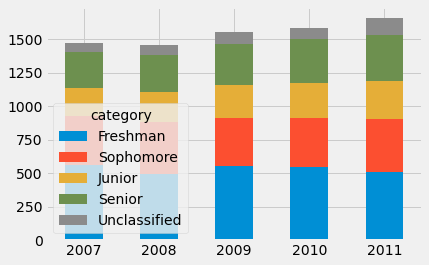

In [37]:
enrollment.set_index("category").T.plot(kind="bar", stacked=True, rot=0);

<AxesSubplot:>

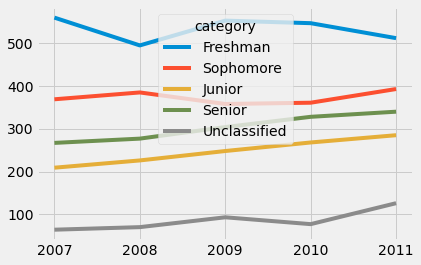

In [38]:
enrollment.set_index("category").T.plot()

In [57]:
enrollment

,category,2007,2008,2009,2010,2011
0,Freshman,560,495,553,547,512
1,Sophomore,369,385,358,361,393
2,Junior,209,226,248,268,285
3,Senior,267,277,304,328,340
4,Unclassified,64,70,93,77,126


In [54]:
enrollmentx = pd.melt(
    enrollment, 
    id_vars="category", 
    value_vars=["2007", "2008", "2009", "2010", "2011"],
    var_name="year",
    value_name="headcount"
)
enrollmentx

,category,year,headcount
0,Freshman,2007,560
1,Sophomore,2007,369
2,Junior,2007,209
3,Senior,2007,267
4,Unclassified,2007,64
5,Freshman,2008,495
6,Sophomore,2008,385
7,Junior,2008,226
8,Senior,2008,277
9,Unclassified,2008,70


In [59]:
crosstab = pd.crosstab(
    index=enrollmentx["category"], 
    columns=enrollmentx["year"], 
    values=enrollmentx["headcount"], 
    aggfunc="sum",
#     margins=True,
#     margins_name="Total"
)
crosstab

year,2007,2008,2009,2010,2011
category,,,,,
Freshman,560,495,553,547,512
Junior,209,226,248,268,285
Senior,267,277,304,328,340
Sophomore,369,385,358,361,393
Unclassified,64,70,93,77,126


In [80]:
dof = (crosstab.shape[0] - 1) * (crosstab.shape[1] - 1)
dof

16

In [81]:
ddof = crosstab.size - 1 - dof
ddof

8

In [66]:
crosstab_exp = pd.DataFrame(expected_freq(crosstab), columns=crosstab.columns, index=crosstab.index)
crosstab_exp

year,2007,2008,2009,2010,2011
category,,,,,
Freshman,507.818924,502.287881,537.893973,546.536228,572.462994
Junior,235.344653,232.781335,249.282696,253.287881,265.303435
Senior,288.658976,285.514971,305.754504,310.667012,325.404537
Sophomore,355.301879,351.432016,376.344264,382.390927,400.530914
Unclassified,81.875567,80.983798,86.724563,88.117952,92.298121


In [82]:
stats.chisquare(crosstab.values.ravel(), f_exp=crosstab_exp.values.ravel(), ddof=ddof)

Power_divergenceResult(statistic=46.78126009552852, pvalue=7.365702337013402e-05)

In [83]:
# get critical chi2 value for p-value 0.05 and df = 5
stats.chi2.ppf(.95, df=dof)

26.29622760486423

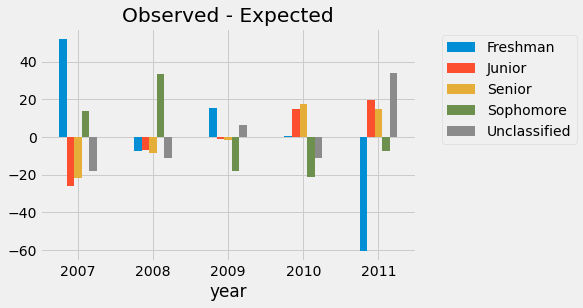

In [96]:
ax = (crosstab - crosstab_exp).T.plot(kind="bar", title="Observed - Expected", rot=0)
ax.legend(bbox_to_anchor=(1.05, 1));

Our chi2 > critical chi2. Therefore, we must reject our null hypothesis $H_0$ and conclude that class level and year are not independent. They are **statistically related**.

The differences between what we expected and our observations were too great to be explained by chance alone.

**Example 3**

Differences between visits in Headlines are due to chance or not?

In [100]:
clicks = pd.read_csv("data/click_rates.csv")
clicks

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988


In [102]:
crosstab = pd.crosstab(
    index=clicks['Click'],
    columns=clicks['Headline'],
    values=clicks['Rate'],
    aggfunc="sum"
)

crosstab

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [103]:
crosstab_exp = pd.DataFrame(expected_freq(crosstab), columns=crosstab.columns, index=crosstab.index)
crosstab_exp

Headline,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


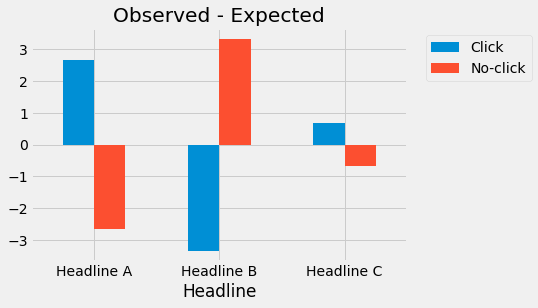

In [109]:
ax = (crosstab - crosstab_exp).T.plot(kind="bar", title="Observed - Expected", rot=0)
ax.legend(bbox_to_anchor=(1.35, 1));

In [111]:
# degrees of freedom = (rows - 1) * (cols - 1)
dof = (crosstab.shape[0] - 1) * (crosstab.shape[1] - 1)
ddof = crosstab.size - 1 - dof
dof, ddof

(2, 3)

In [113]:
critical_chi2 = stats.chi2.ppf(.95, dof)
critical_chi2

5.991464547107979

In [114]:
stats.chisquare(crosstab.values.ravel(), f_exp=crosstab_exp.values.ravel(), ddof=ddof)

Power_divergenceResult(statistic=1.6659394708658917, pvalue=0.4347562562343731)